# Predicting Uber NYC Pickup Demands using different models and ANN Architectures 

#### Submitted by :   Shriya Garg   |  Bennett University

## Objective:

In this project, I attempted to visualize, explore and experiment various different models and ANN techniques that would effectively as well as efficiently predict the Uber NYC Pickups Demand. This is an extension of the other project that we did on Bike-sharing Demand.

This is a unique problem with huge amount of datasets (approx 4.5 million values) but only 2 considerable classes.

## Dataset :

This Dataset is taken from Kaggle 'https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city'.

This directory contains data on over 4.5 million Uber pickups in New York City from April to September 2014. 
 This data was used for four FiveThirtyEight stories: Uber Is Serving New York’s Outer Boroughs More Than Taxis Are, Public Transit Should Be Uber’s New Best Friend, Uber Is Taking Millions Of Manhattan Rides Away From Taxis, and Is Uber Making NYC Rush-Hour Traffic Worse?.

#### Uber trip data from 2014
There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:

   - Date/Time : The date and time of the Uber pickup
   - Lat : The latitude of the Uber pickup
   - Lon : The longitude of the Uber pickup
   - Base : The TLC base company code affiliated with the Uber pickup
    
These files are named:
   - uber-raw-data-apr14.csv
   - uber-raw-data-aug14.csv
   - uber-raw-data-jul14.csv
   - uber-raw-data-jun14.csv
   - uber-raw-data-may14.csv
   - uber-raw-data-sep14.csv

## Steps Involved :

1. Data Preprocessing
2. Visualizations
3. Splitting of Dataset
4. Training and Testing on various models
    - Time Series Forecasting (Sarima, Arima, Holt Winter, Holt Linear) 
    - AR Model
    - Exponential Smoothing
    - ANN Model
5. Results

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))
from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


### Import and Preprocess Dataset

In [3]:
uber_raw_apr14 =pd.read_csv('uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
uber_raw_may14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
uber_raw_jun14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
uber_raw_jul14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
uber_raw_aug14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
uber_raw_sep14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

#Combining dataset of 6 months into 1 dataset
uber_2014 = [uber_raw_apr14, uber_raw_may14, uber_raw_jun14, uber_raw_jul14,uber_raw_aug14, uber_raw_sep14]
uber_data_2014 = pd.concat(uber_2014,axis=0,ignore_index=True)
uber_data_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
uber_data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


#### Dividing the above Date/Time columns into several columns for visualising and analysing the dataset

In [5]:
uber_data_2014.Timestamp = pd.to_datetime(uber_data_2014['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
uber_data_2014['Date_only'] = uber_data_2014.Timestamp.dt.date
uber_data_2014['Date'] = uber_data_2014.Timestamp
uber_data_2014['Month'] = uber_data_2014.Timestamp.dt.month
uber_data_2014['DayOfWeekNum'] = uber_data_2014.Timestamp.dt.dayofweek
uber_data_2014['DayOfWeek'] = uber_data_2014.Timestamp.dt.weekday_name
uber_data_2014['MonthDayNum'] = uber_data_2014.Timestamp.dt.day
uber_data_2014['HourOfDay'] = uber_data_2014.Timestamp.dt.hour

uber_data_2014= uber_data_2014.drop(columns = ['Lat','Lon'])
uber_data_2014.tail()

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Date/Time,Base,Date_only,Date,Month,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
4534322,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534323,9/30/2014 22:57:00,B02764,2014-09-30,2014-09-30 22:57:00,9,1,Tuesday,30,22
4534324,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534325,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22
4534326,9/30/2014 22:58:00,B02764,2014-09-30,2014-09-30 22:58:00,9,1,Tuesday,30,22


### Visualizations

#### Peak Days

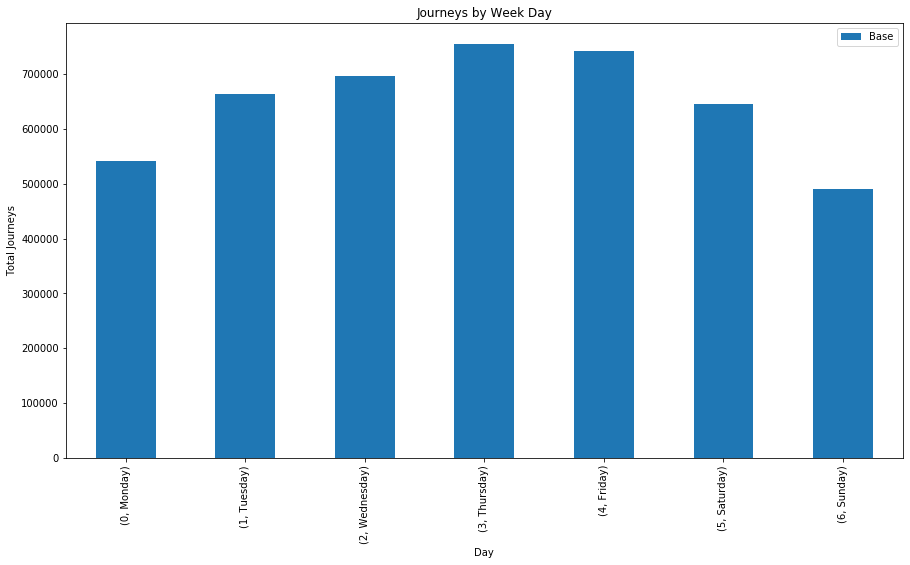

In [6]:
uber_data_2014.groupby(pd.Grouper(key='DayOfWeek')).count()

uber_weekdays = uber_data_2014.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(15,8))
plt.ylabel('Total Journeys')
plt.xlabel('Day')
plt.title('Journeys by Week Day');

Here we can see that the larest number of uber pickups were done on Thurdays and Fridays

#### Analysing peek hours

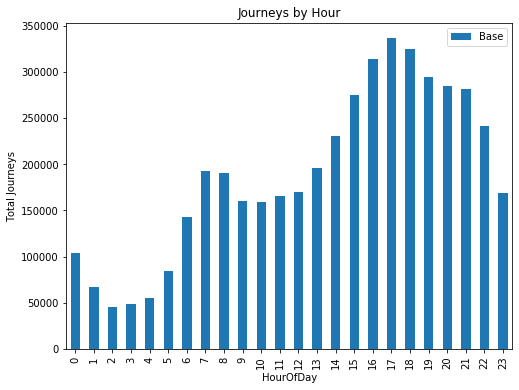

In [7]:
uber_hour = uber_data_2014.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

From here we can see that peak hours of booking a cab are in evening from 4pm to 6pm.
We can also see that more cabs are booked in evenings compared to mornings

#### Base

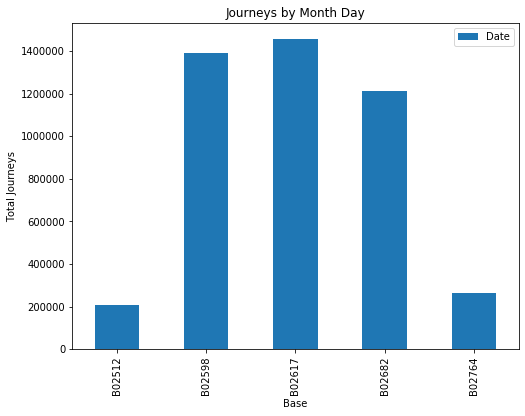

In [8]:
uber_data_2014.groupby(pd.Grouper(key='Base')).count()

uber_monthdays = uber_data_2014.pivot_table(index=['Base'], values='Date' ,
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

Here we can see that Base B02617 provided most cabs. Closely followed by B02598

### Splitting the dataset

As we have a very large dataset of 4.5 million+ values. I have used 90-10 split

In [9]:
uber_data_2014= uber_data_2014.drop(columns = ['Month','DayOfWeekNum','Base', 'DayOfWeek', 'MonthDayNum', 'HourOfDay'])
#uber_data_2014.tail()

In [10]:
'''
The df uber_count is the grouping of the above dataset on hourly basis with time stamp of both date and time.
This df is used mostly for ANN analysis.
'''
uber_count=uber_data_2014.groupby(pd.Grouper(key='Date')).count()
uber_count= uber_count.drop(columns = ['Date_only'])
print(uber_count.info())

train = uber_count[:][:234083]             #90% of 260093
test = uber_count[:][234084:]
display(train.tail())
test.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260093 entries, 2014-04-01 00:11:00 to 2014-09-30 03:26:00
Data columns (total 1 columns):
Date/Time    260093 non-null int64
dtypes: int64(1)
memory usage: 4.0 MB
None


,Date/Time
Date,
2014-09-24 09:49:00,25
2014-09-24 09:50:00,16
2014-09-24 09:52:00,24
2014-09-24 09:56:00,15
2014-09-24 09:57:00,23


,Date/Time
Date,
2014-09-24 09:59:00,19
2014-09-24 10:00:00,15
2014-09-24 10:04:00,10
2014-09-24 10:05:00,17
2014-09-24 10:06:00,16


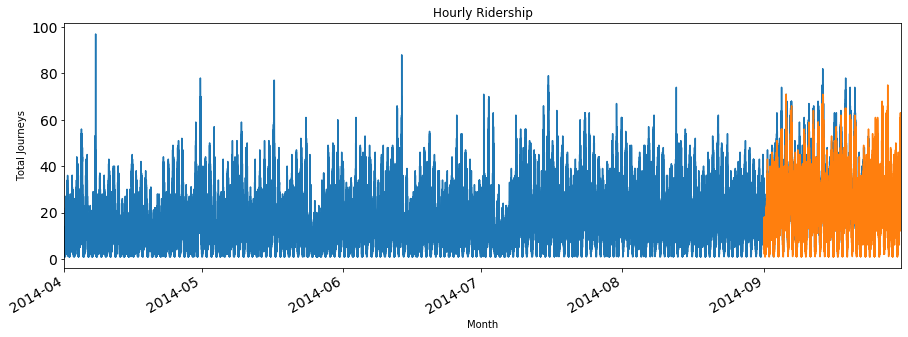

In [11]:
train['Date/Time'].plot(kind='line',figsize=(15,8), title= 'Hourly Ridership', fontsize=14)
test['Date/Time'].plot(figsize=(15,5), title= 'Hourly Ridership', fontsize=14)
plt.ylabel('Total Journeys')
plt.xlabel('Month')
plt.show()

In [12]:
'''
The df uber_dates is the grouping of the above dataset on daily basis with time stamp of onlu date.
This df is used to for univariate Time Series Forecasting.
'''
uber_dates=uber_data_2014.groupby(pd.Grouper(key='Date_only')).count()
uber_dates= uber_dates.drop(columns = ['Date'])
print(uber_dates.info())
uber_dates_d= uber_dates.drop(columns = ['Date/Time'])

train_ts = uber_dates[:][:163]                     #split is 90-10
test_ts = uber_dates[:][164:]
test_ts_d = uber_dates_d[:][164:]
test_ts.head()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2014-04-01 to 2014-09-30
Data columns (total 1 columns):
Date/Time    183 non-null int64
dtypes: int64(1)
memory usage: 2.9+ KB
None


,Date/Time
Date_only,
2014-09-12,39540
2014-09-13,43205
2014-09-14,28122
2014-09-15,29454
2014-09-16,36092


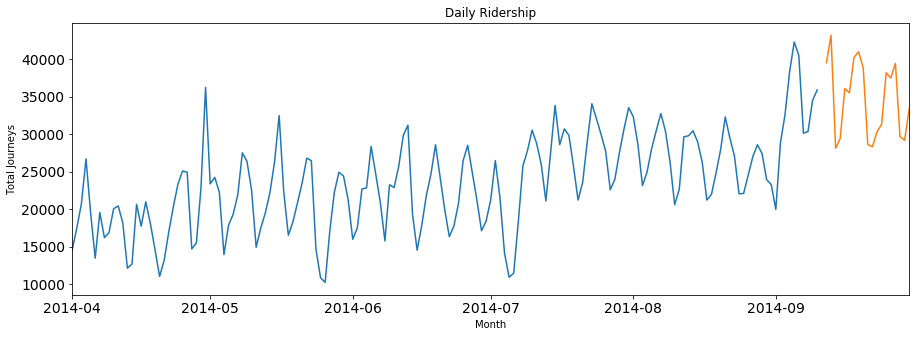

In [13]:
train_ts['Date/Time'].plot(kind='line',figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test_ts['Date/Time'].plot(figsize=(15,5), title= 'Daily Ridership', fontsize=14)
plt.ylabel('Total Journeys')
plt.xlabel('Month')
plt.show()

## Time Series Forcasting

### Holt’s Winter seasonal method

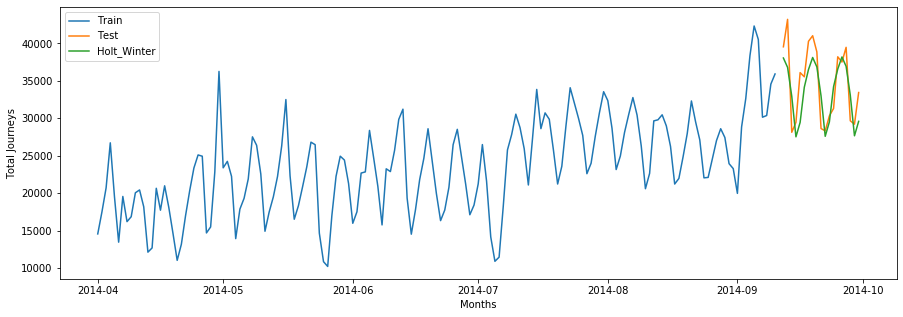

In [16]:
y_hat_avg = test_ts.copy()
fit1 = ExponentialSmoothing(np.asarray(train_ts['Date/Time'].astype(float)) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_ts))
plt.figure(figsize=(15,5))
plt.plot( train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()

In [17]:
rmse = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg['Holt_Winter']))
rmse

3326.1220426646896

This model also gives comparitively the best accuracy compared to other Time Series Forecasting Methods. It has comparitively lower RMSE and we can see from the above plot that the predicted Holt winter graph is almost overlapping with the actual test dataset available to us

### SARIMA Model

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


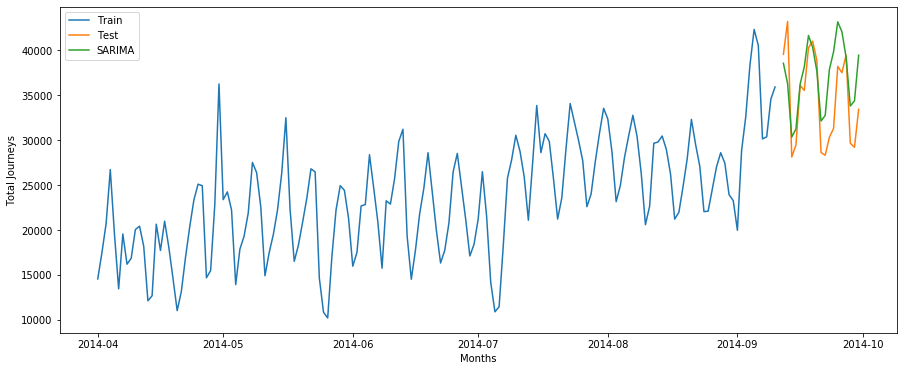

In [18]:
y_hat_avg = test_ts.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_ts['Date/Time'], order=(2, 1, 4),seasonal_order=(1,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-09-11", end="2014-09-30", dynamic=True)
plt.figure(figsize=(15,6))
plt.plot( train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()


In [19]:
rms = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg.SARIMA))
print(rms)     

4318.986982403872


This model also predicts with comparable accuracy as the above holt winter season method as we can see here as well that the predicted sarima graph is almost overlapping with the actual test dataset available to us

### Holt’s Linear Trend method

<Figure size 1600x800 with 0 Axes>

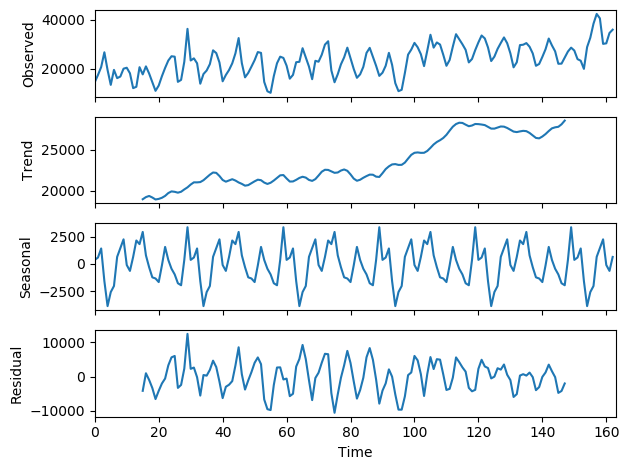

In [20]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train_ts['Date/Time'].values,freq=30).plot()
result = sm.tsa.stattools.adfuller(uber_dates['Date/Time'])
plt.show()

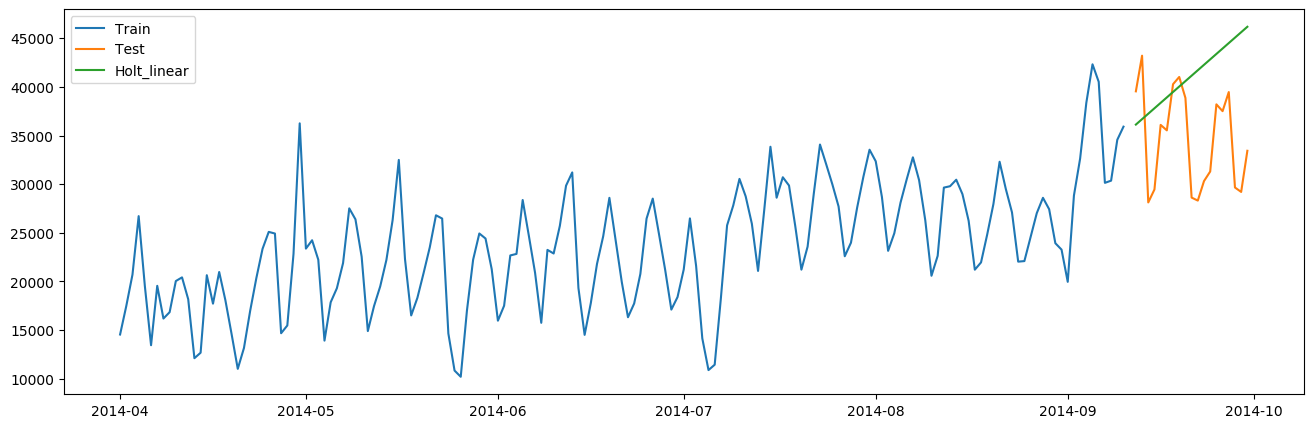

In [22]:
y_hat_avg = test_ts.copy()

fit1 = Holt(np.asarray(train_ts['Date/Time']).astype(float)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test_ts))

plt.figure(figsize=(16,5))
plt.plot(train_ts['Date/Time'], label='Train')
plt.plot(test_ts['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg.Holt_linear))
print(rms)     

9185.893757853852


Here we can see that Holt Linear Trend is hardly a good model for our dataset.

### ARIMA

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    #rolmean = pd.rolling_mean(timeseries,window = 24)
    #rolstd = pd.rolling_std(timeseries, window = 24)
    
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

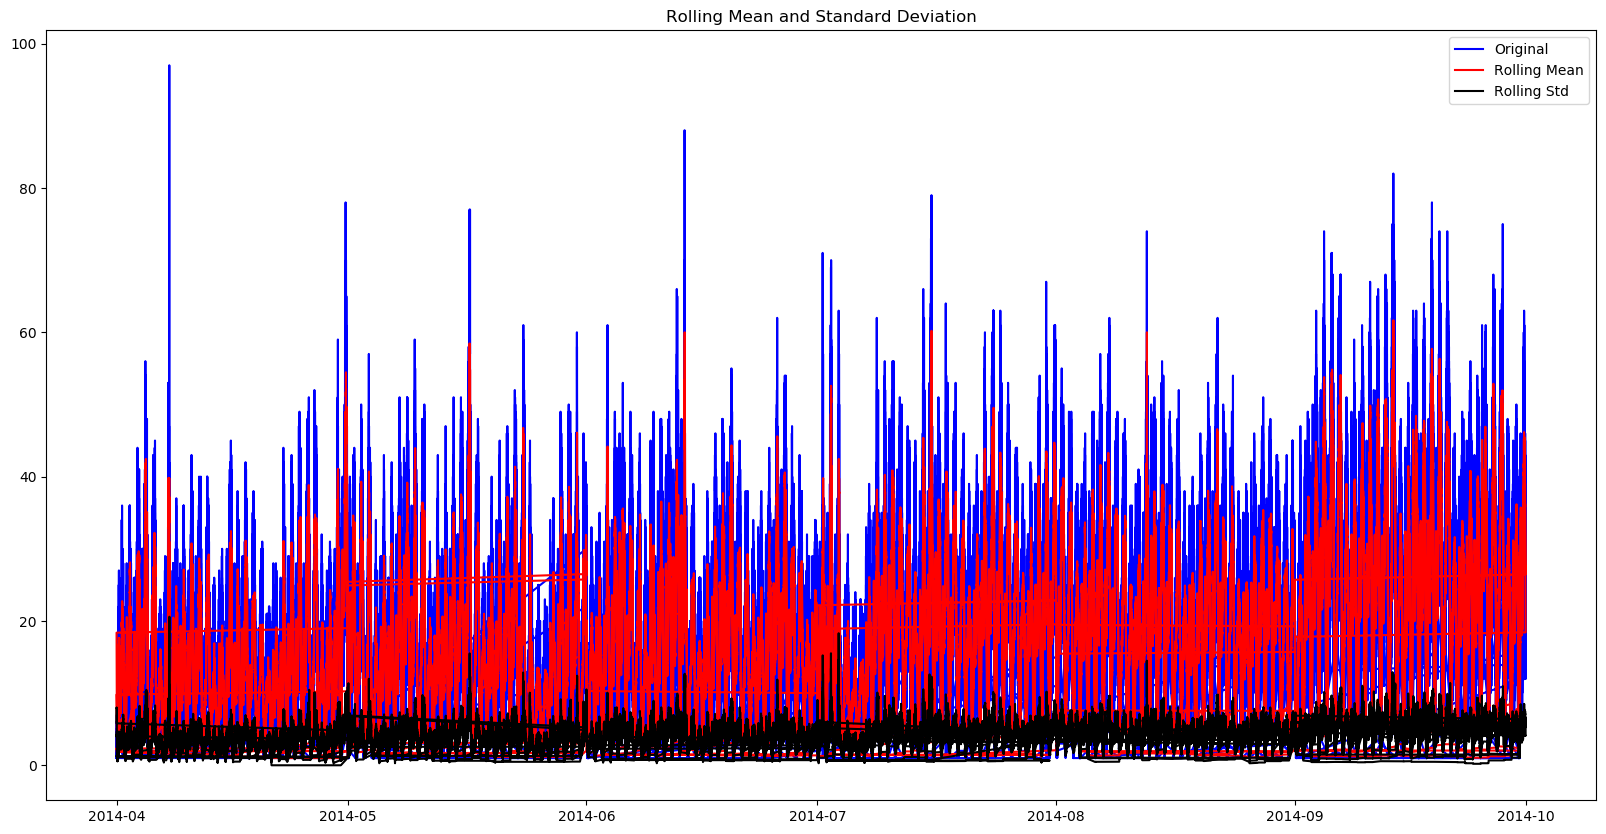

Results of Dickey Fuller test: 
Test Statistics                   -26.382495
p-value                             0.000000
# Lag Used                         85.000000
Number of Observations Used    260007.000000
Critical Value (1%)                -3.430375
Critical Value (5%)                -2.861551
Critical Value (10%)               -2.566776
dtype: float64


In [27]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(uber_count['Date/Time'])

#### Remove Trend

In [28]:
Train_log = np.log(train_ts['Date/Time'])
valid_log = np.log(test_ts['Date/Time'])

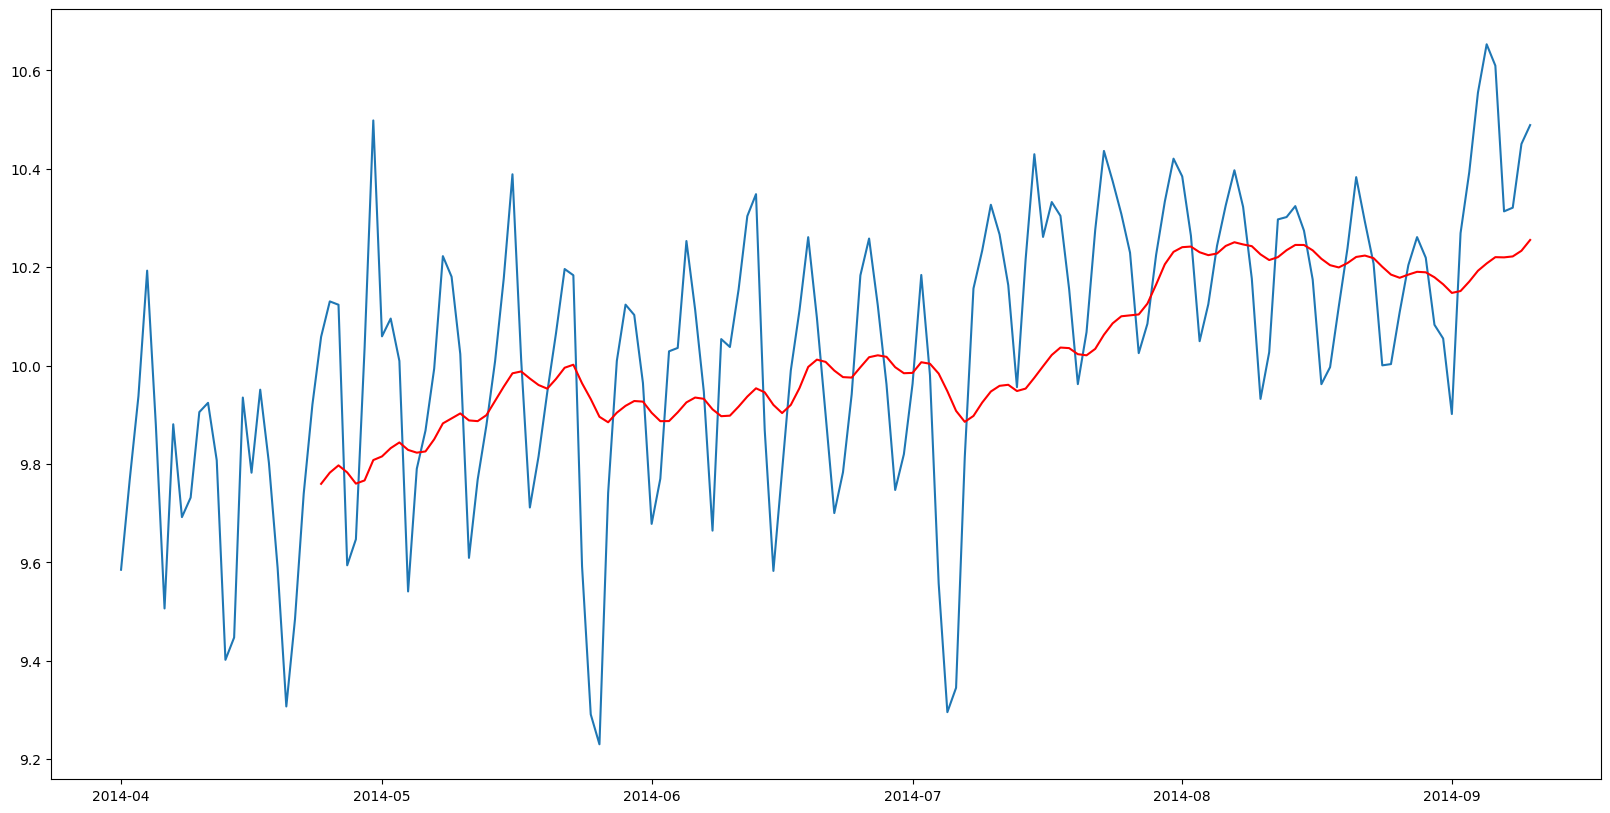

In [29]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

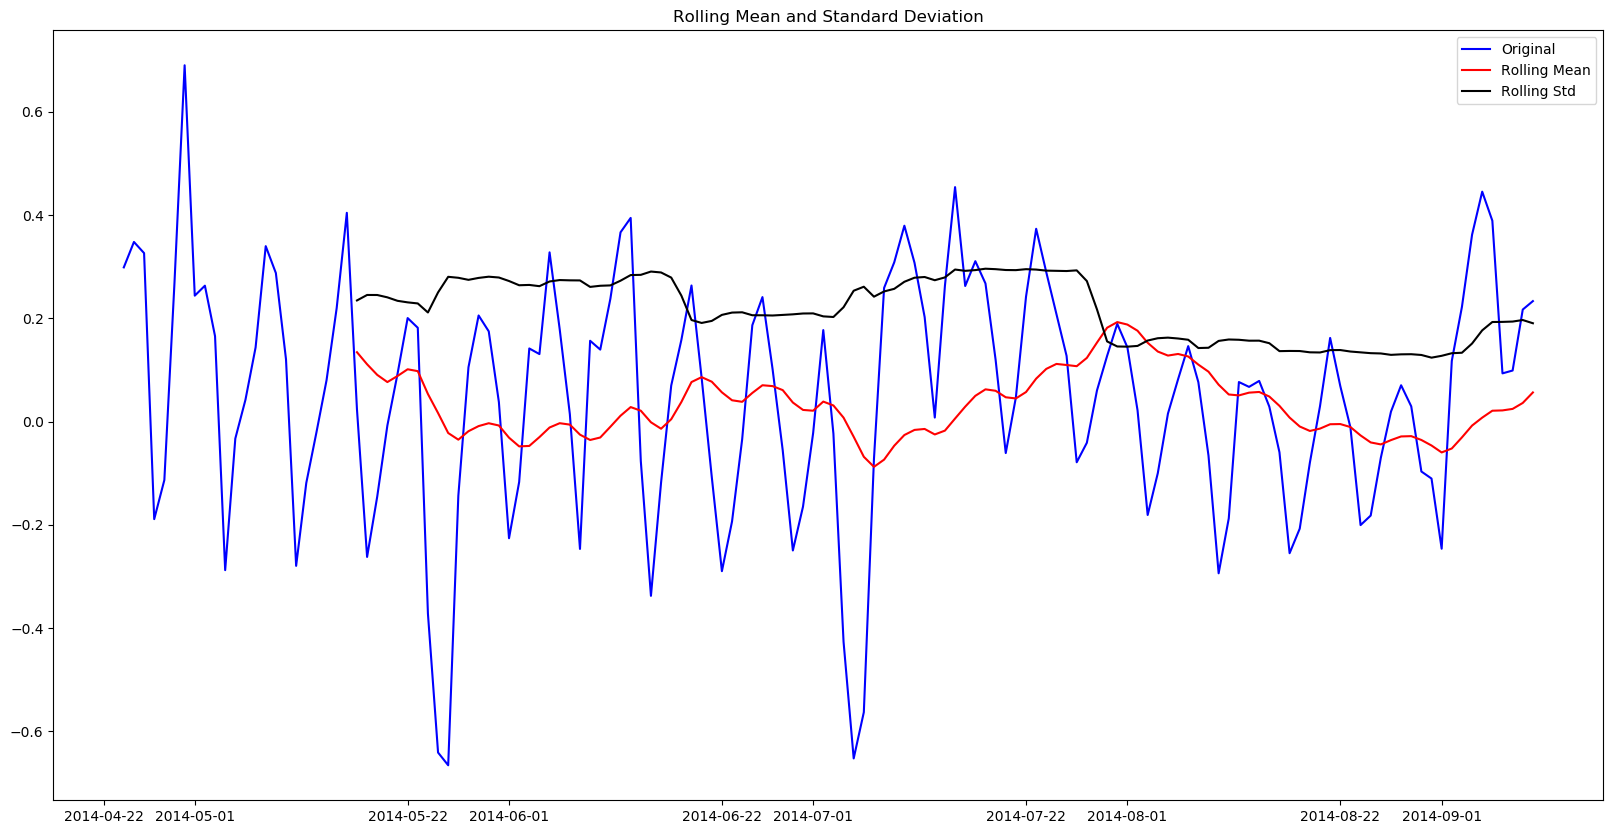

Results of Dickey Fuller test: 
Test Statistics                 -3.511603
p-value                          0.007694
# Lag Used                       7.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


In [30]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

#### Differncing can help to make series stable and eliminate trend

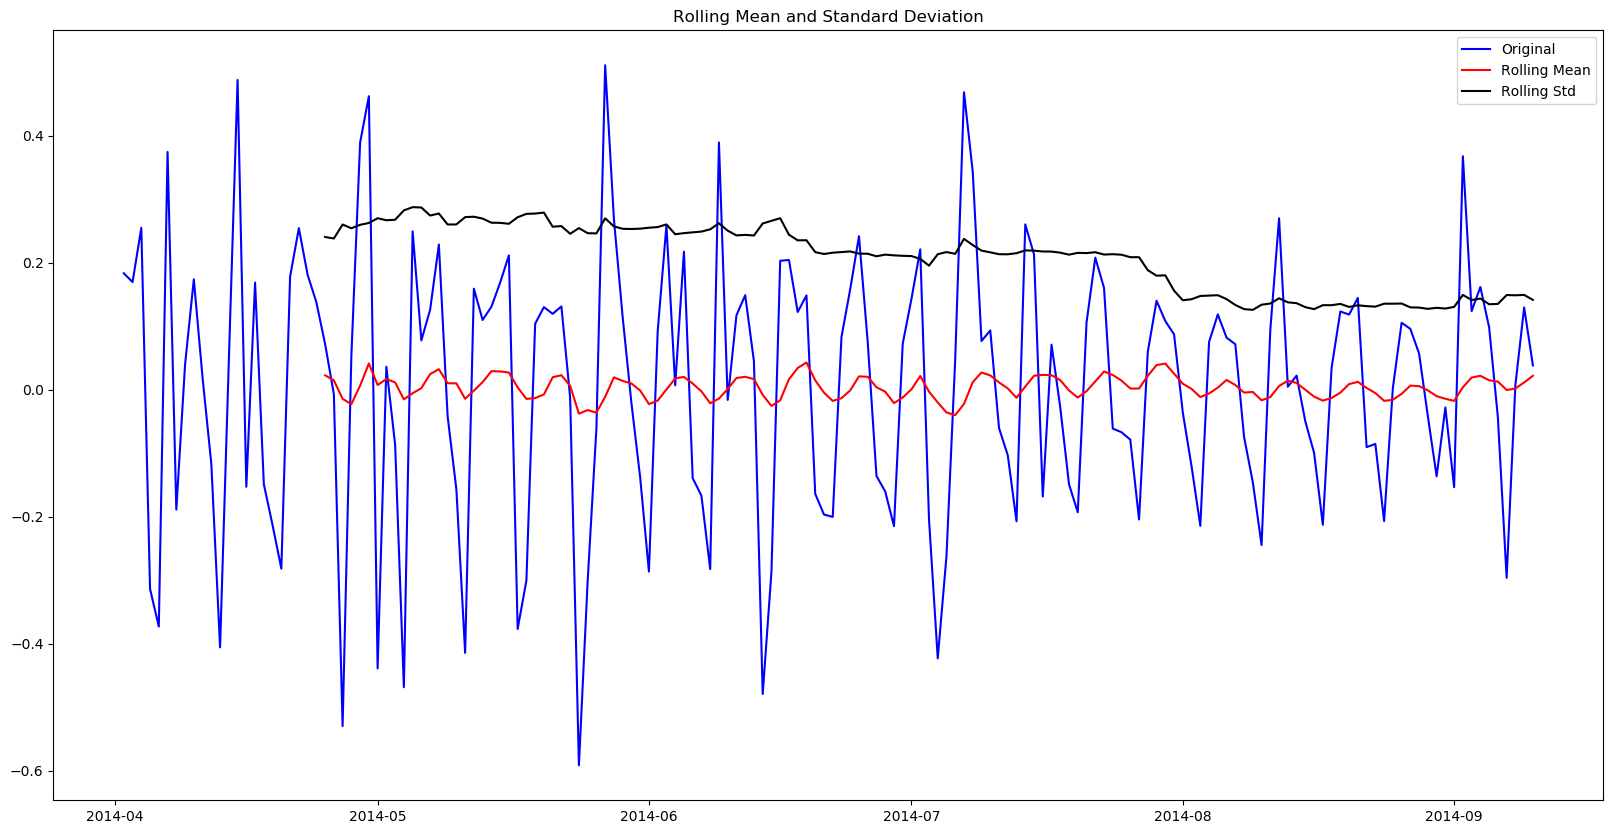

Results of Dickey Fuller test: 
Test Statistics               -6.285840e+00
p-value                        3.700033e-08
# Lag Used                     1.100000e+01
Number of Observations Used    1.500000e+02
Critical Value (1%)           -3.474715e+00
Critical Value (5%)           -2.881009e+00
Critical Value (10%)          -2.577151e+00
dtype: float64


In [31]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

#### Removing Seasonailty

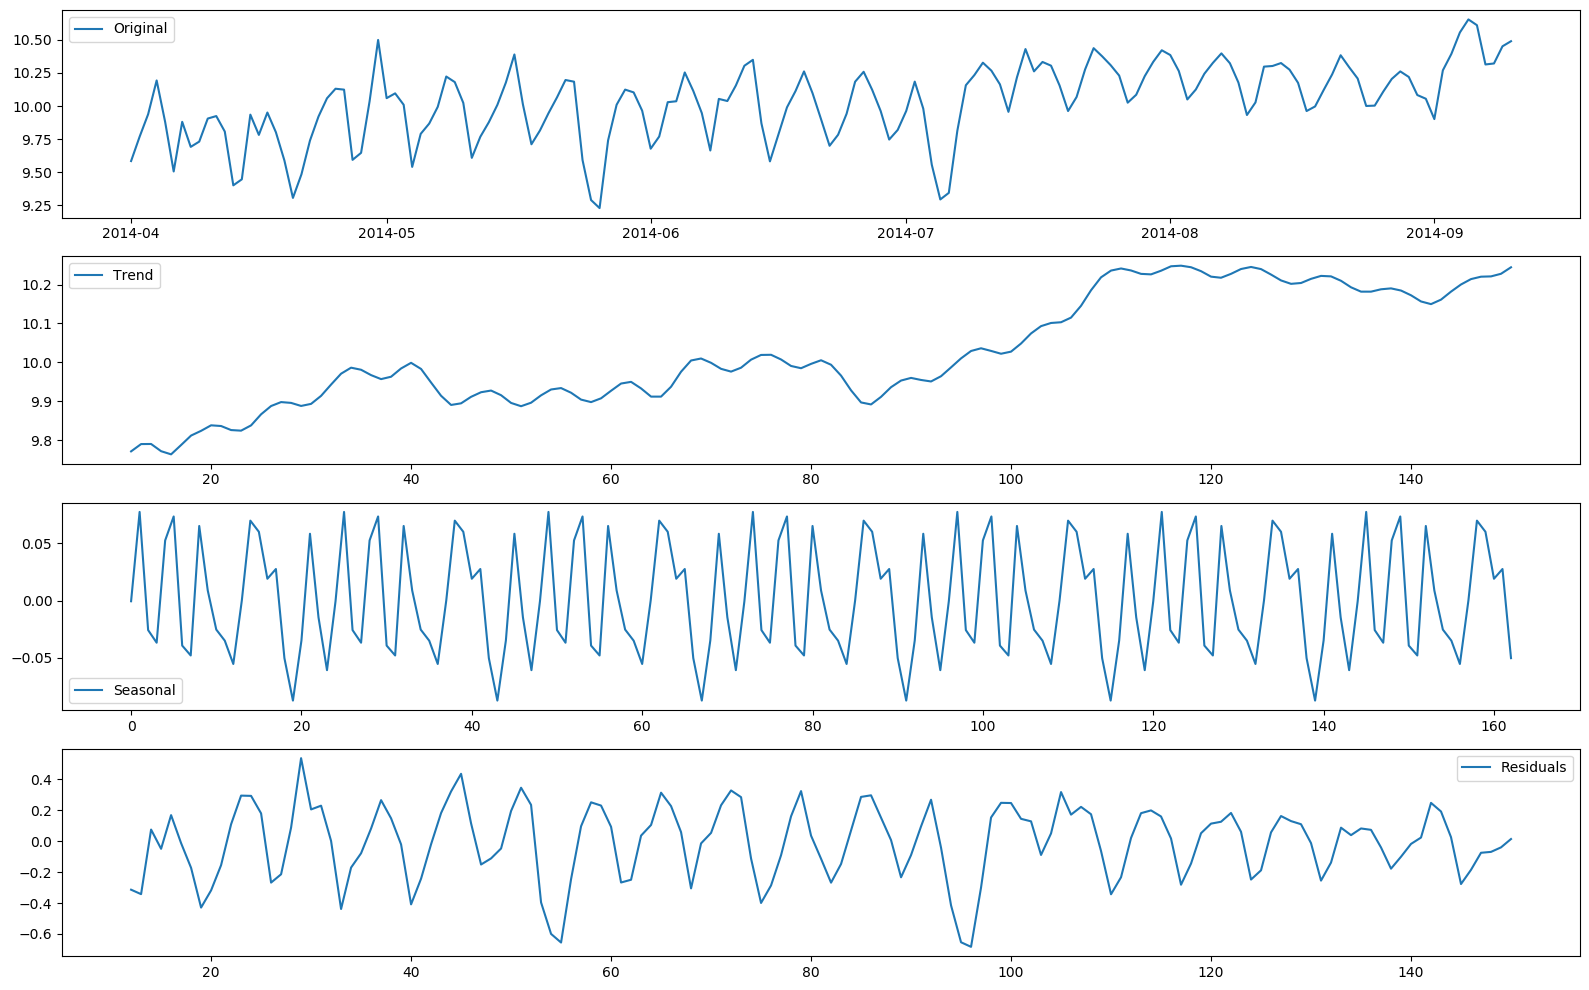

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log)['Date/Time'].values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

#### Checking stationarity of residuals

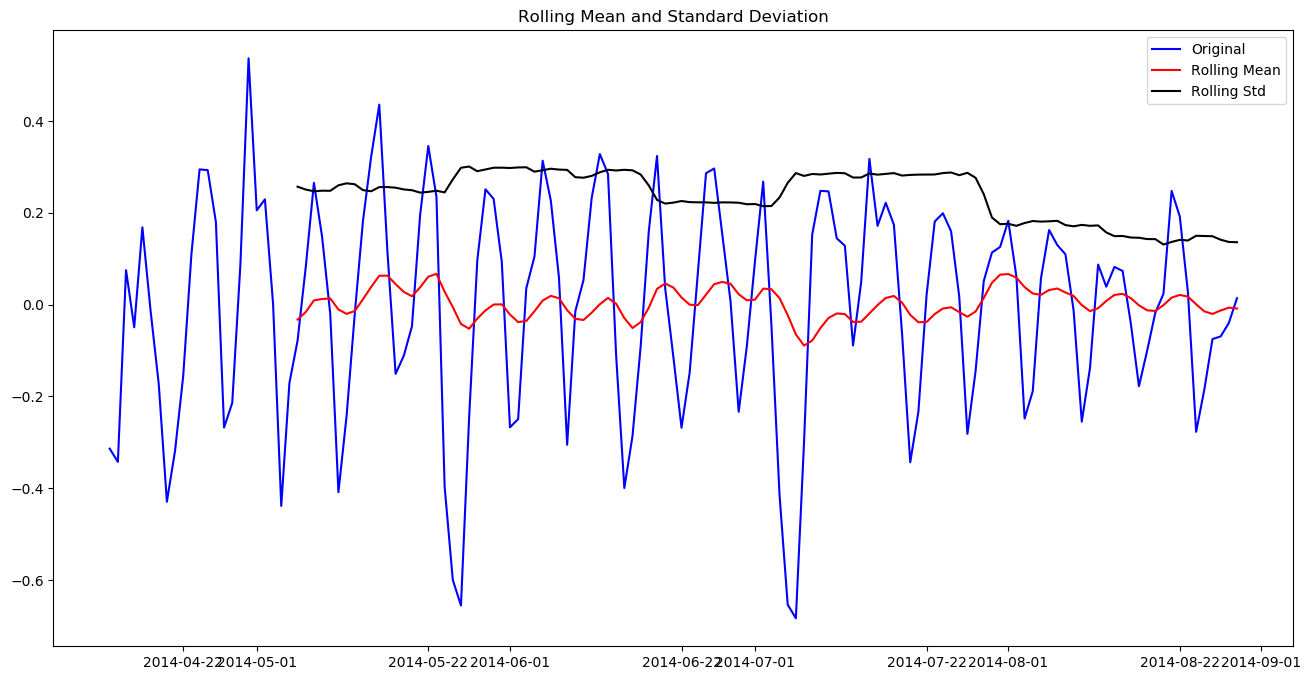

Results of Dickey Fuller test: 
Test Statistics               -6.254903e+00
p-value                        4.362933e-08
# Lag Used                     9.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (1%)           -3.482088e+00
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
dtype: float64


In [33]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [34]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


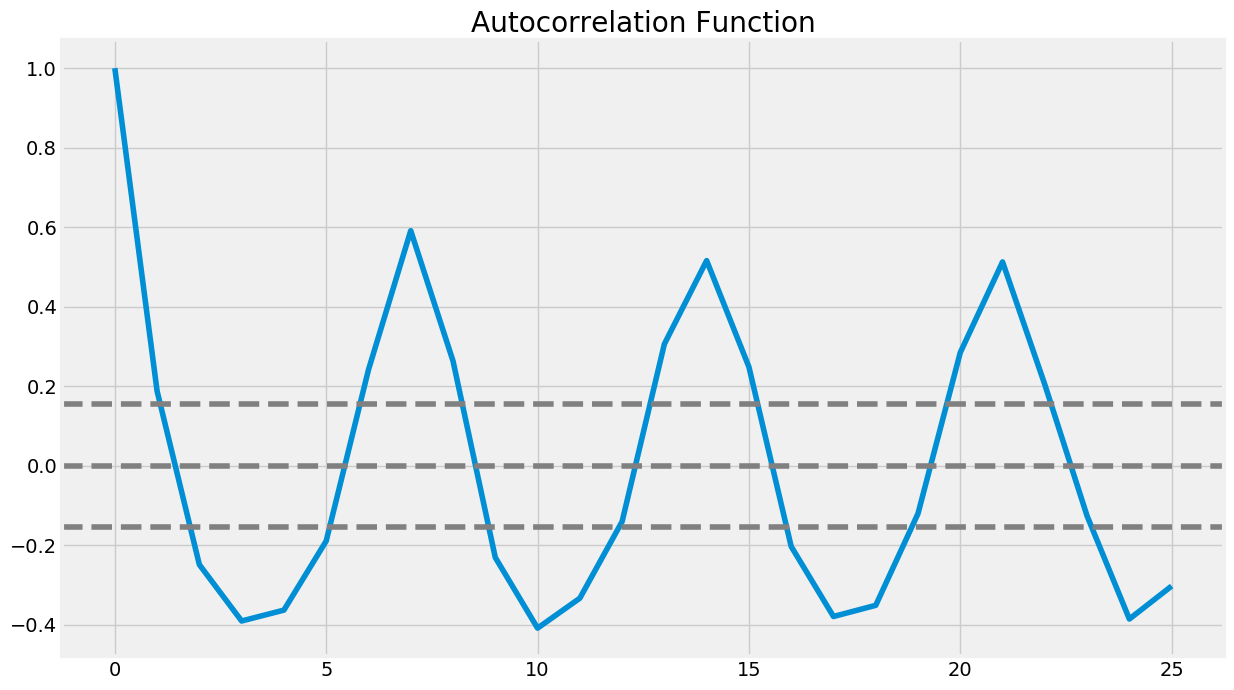

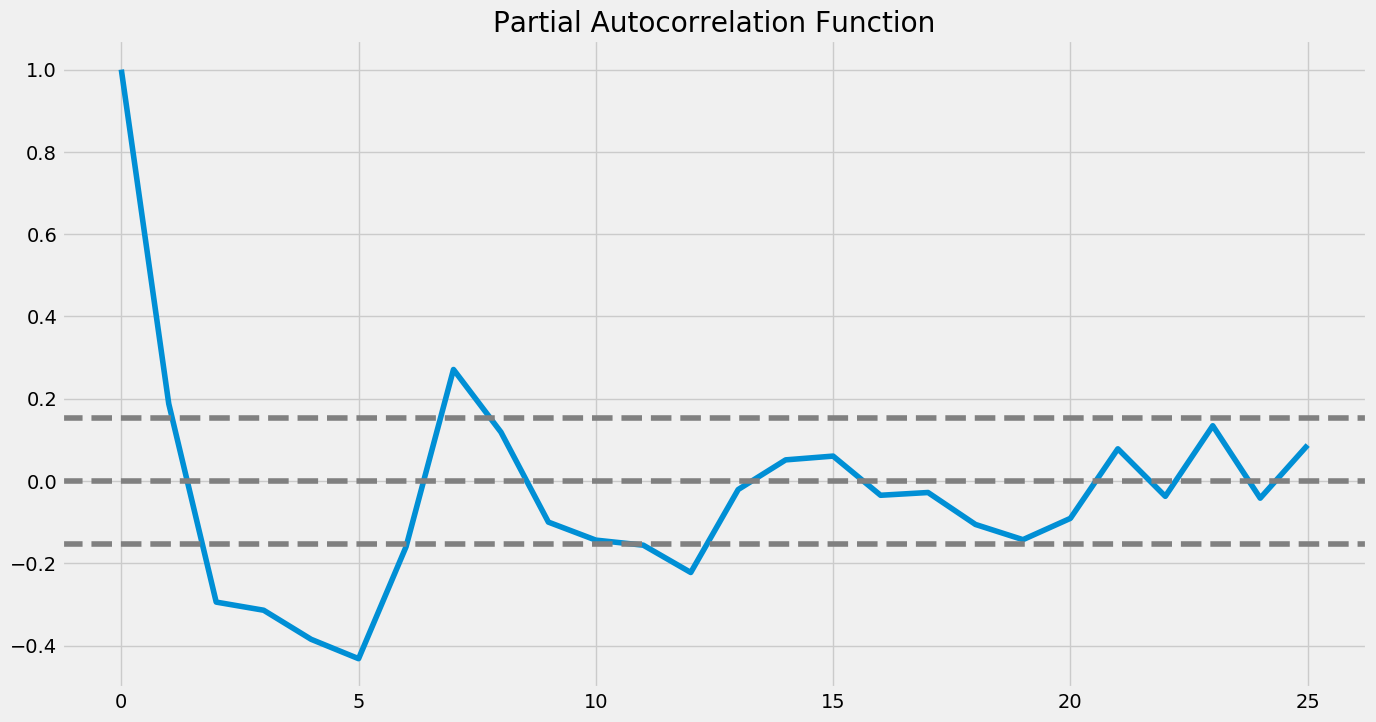

In [35]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR model

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


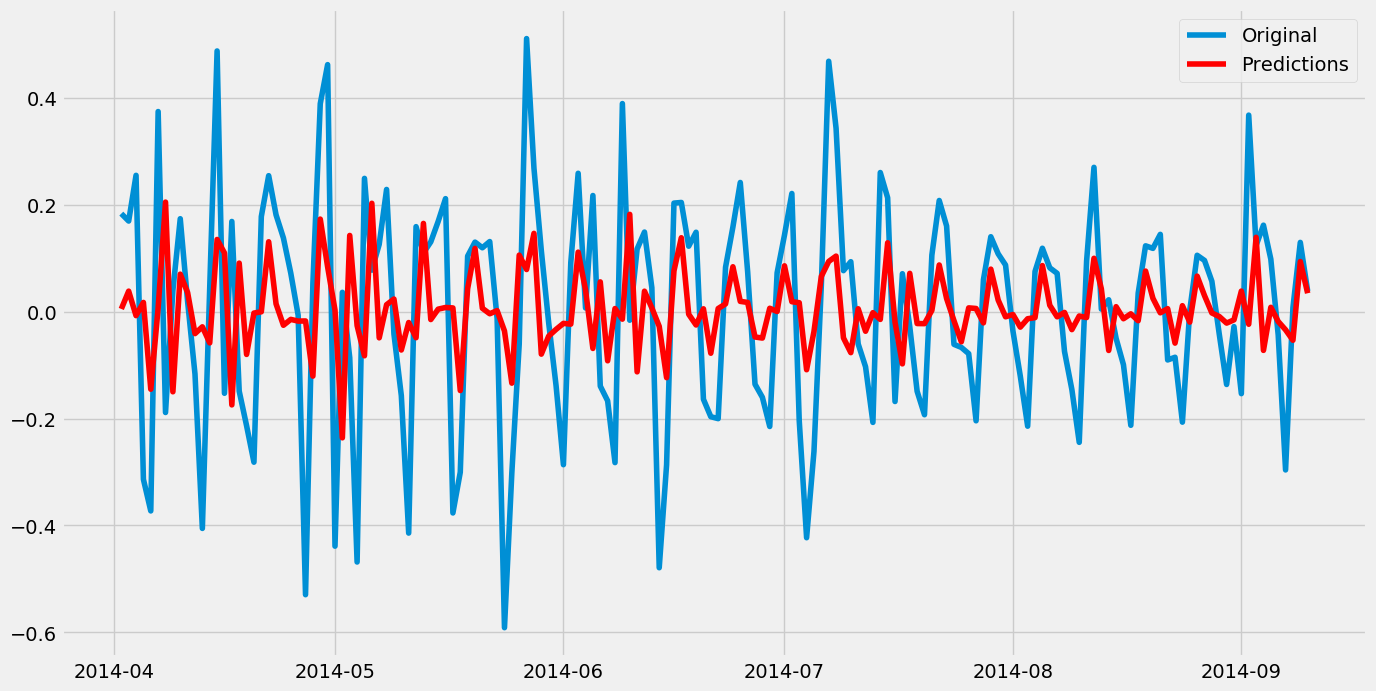

In [36]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [37]:
AR_predict = results_AR.predict(start="2014-09-11", end="2014-09-30")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(test_ts.shape[0])* np.log(test_ts['Date/Time'])[0], index = test_ts_d)
AR_predict = np.exp(AR_predict1)

In [38]:
# Moving Average Model

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


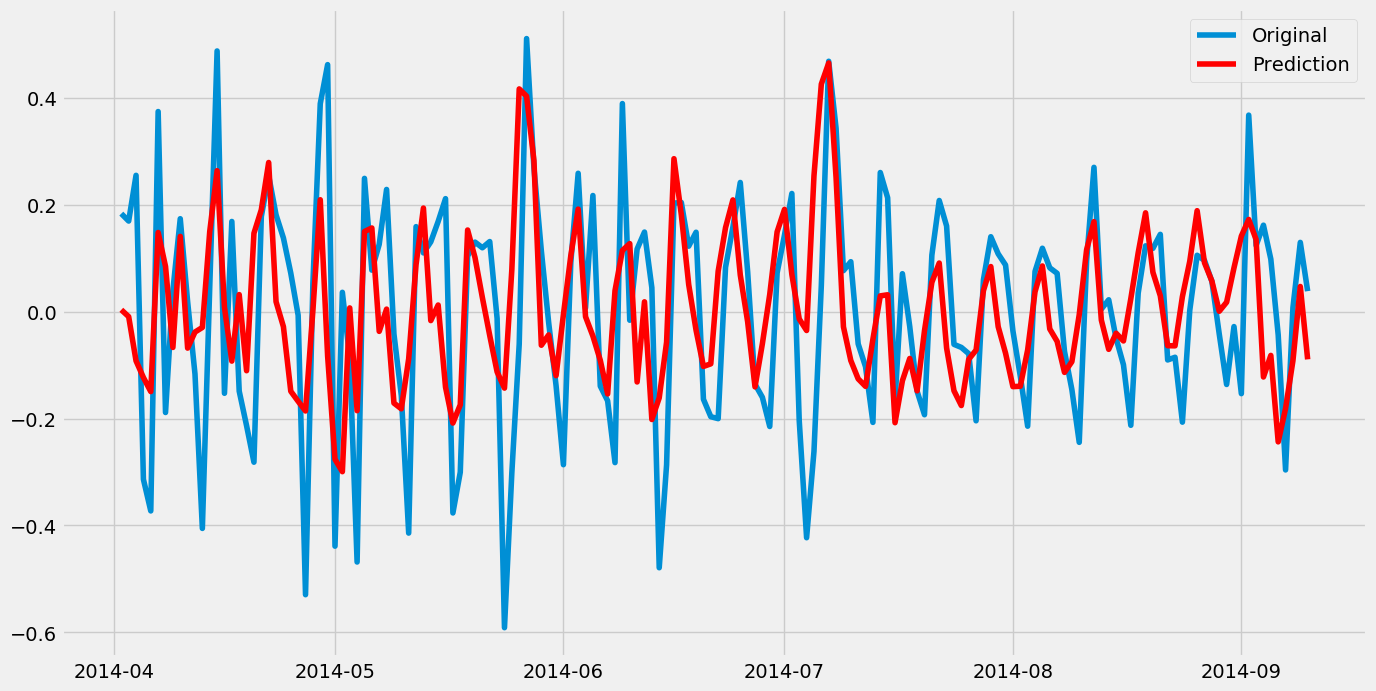

In [39]:
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [40]:
MA_predict = results_MA.predict(start="2014-09-11", end="2014-09-30")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(test_ts.shape[0]) * np.log(test_ts['Date/Time'])[0], index = test_ts_d)
#MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.figure(figsize = (15,8))
plt.plot(test_ts['Date/Time'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test_ts['Date/Time']))/test_ts.shape[0]))
plt.show()

In [41]:
# Combined Model

c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\shriya garg\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


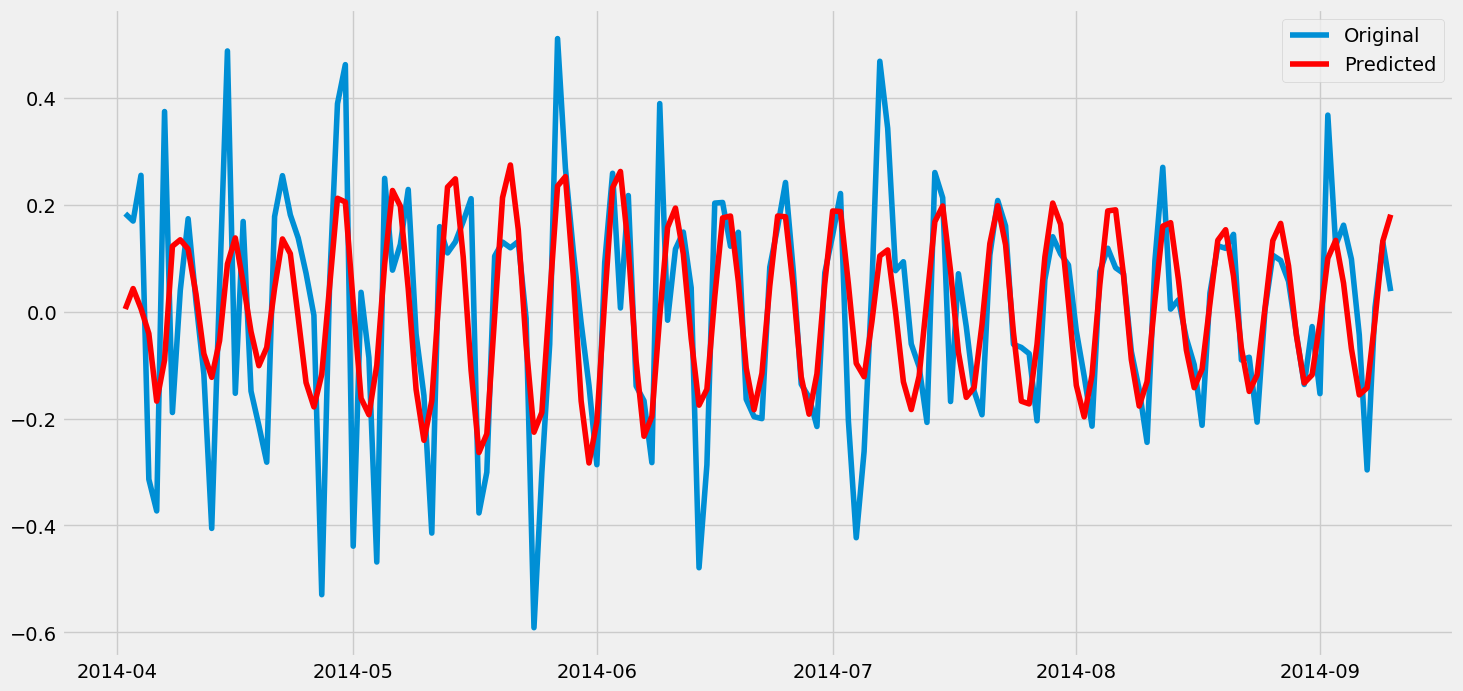

In [42]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [43]:
# Function to scale model to original scale

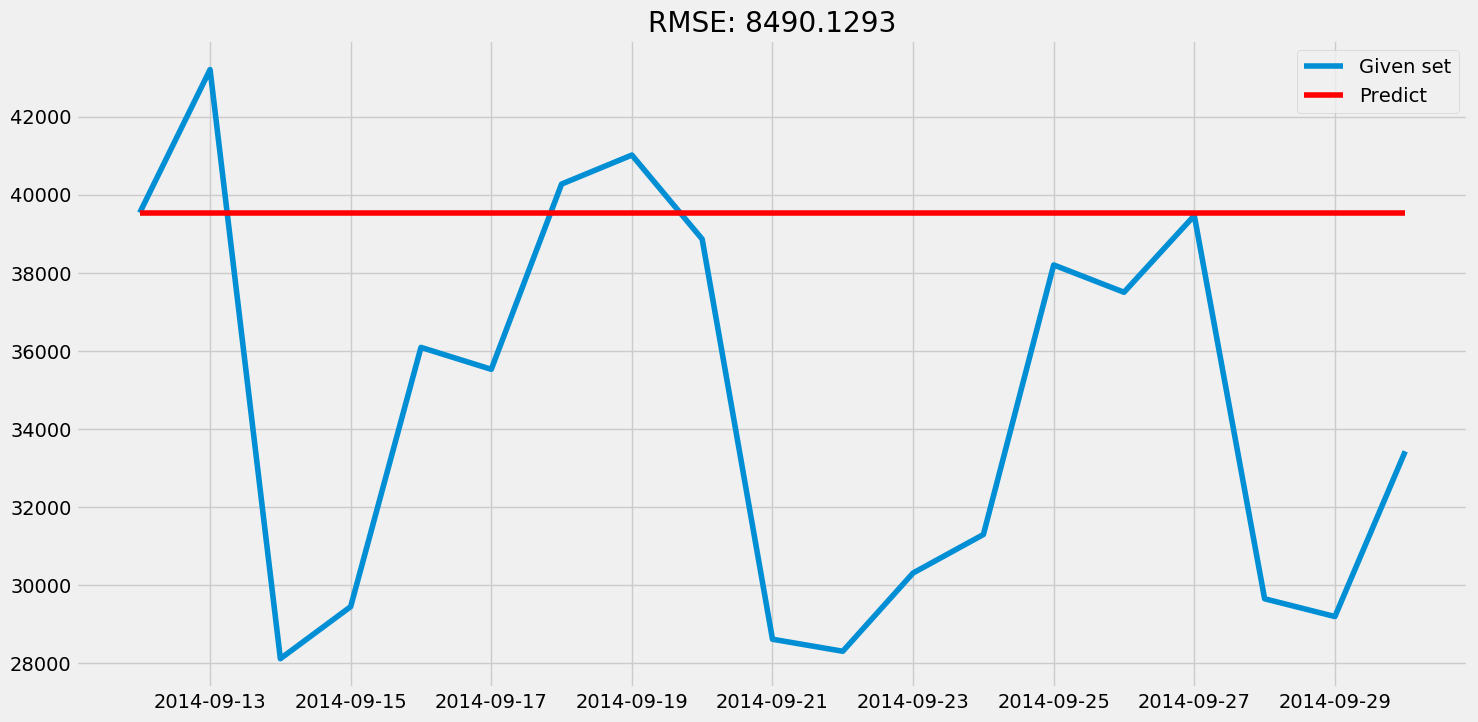

In [44]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Date/Time'])[0], index = given_set.index)
    #predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_base)
    
    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Date/Time'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Date/Time']))/given_set.shape[0]))
    plt.show()

ARIMA_predict_diff=results_ARIMA.predict(start="2014-09-11", end="2014-09-30")

plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test_ts)

In [45]:
ARIMA_predict_diff.shape 


test_ts.shape

(19, 1)

#### The huge RMSE value in AR model shows that this model is not suitable for our dataset

### Simple Exponential Smoothing

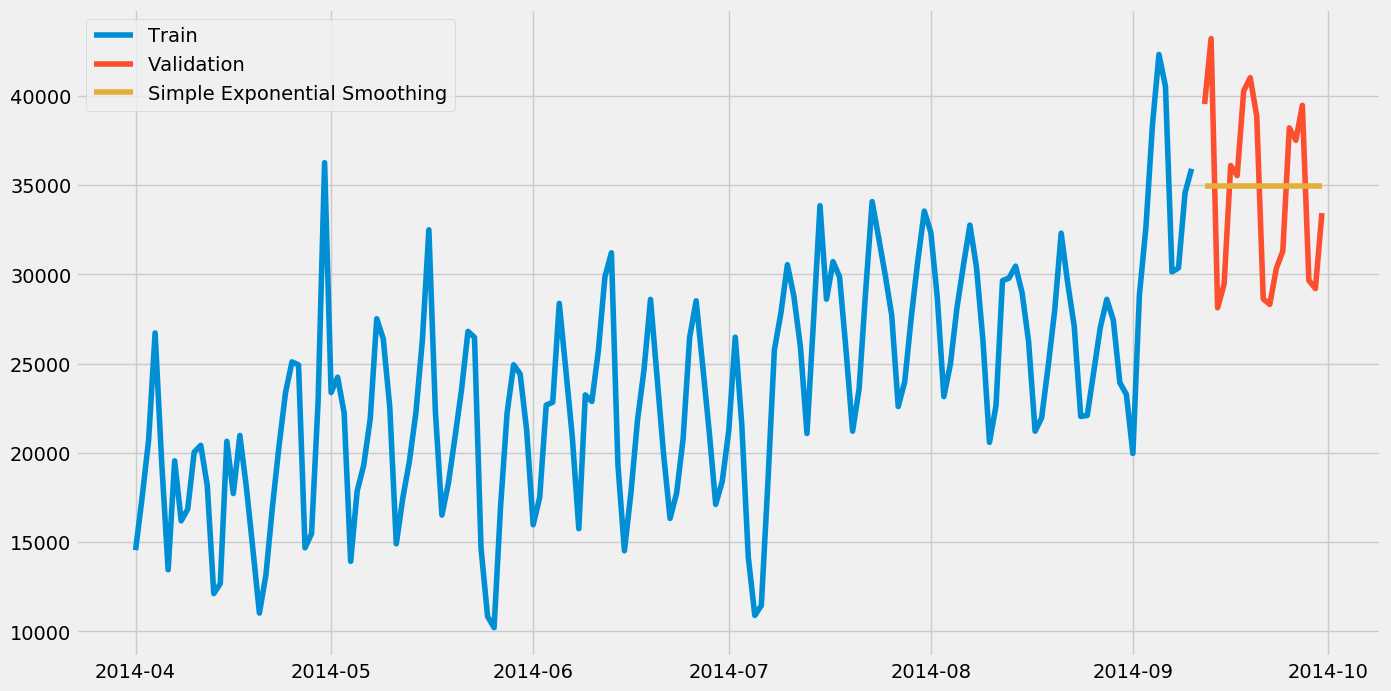

In [46]:
y_hat = test_ts.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_ts['Date/Time'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(test_ts))
plt.figure(figsize =(15,8))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

### RMSE Error for Simple Exponential Smoothing

In [47]:
abc=y_hat['SES'].values.tolist()
rmse = sqrt(mean_squared_error(test_ts['Date/Time'],abc))
rmse

4962.156805721971

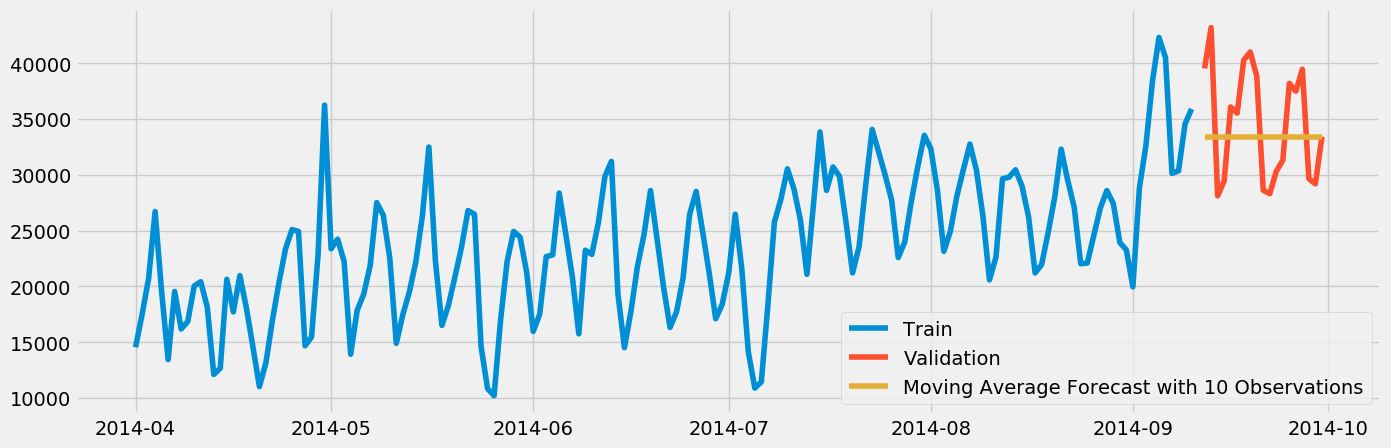

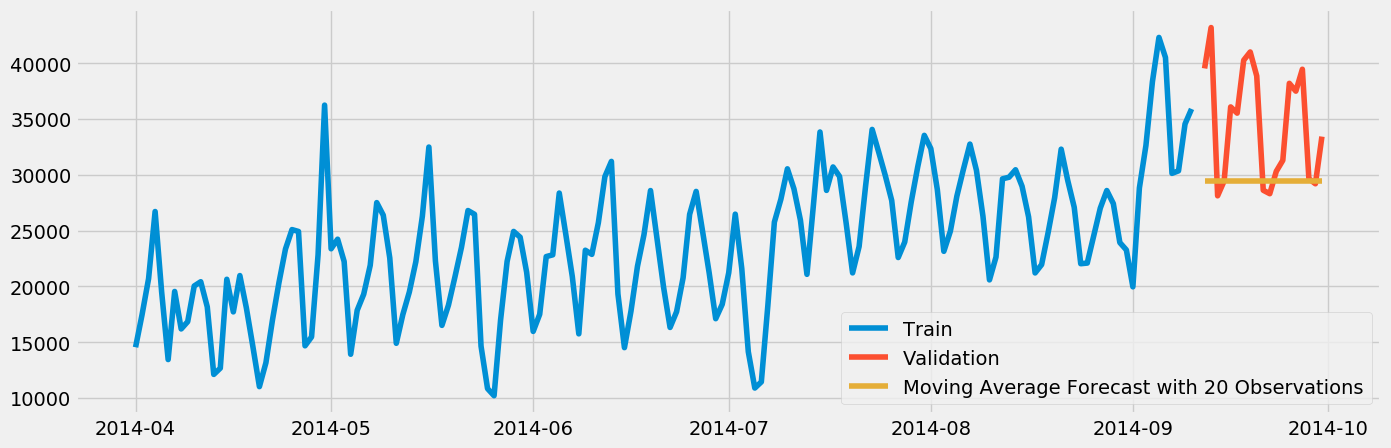

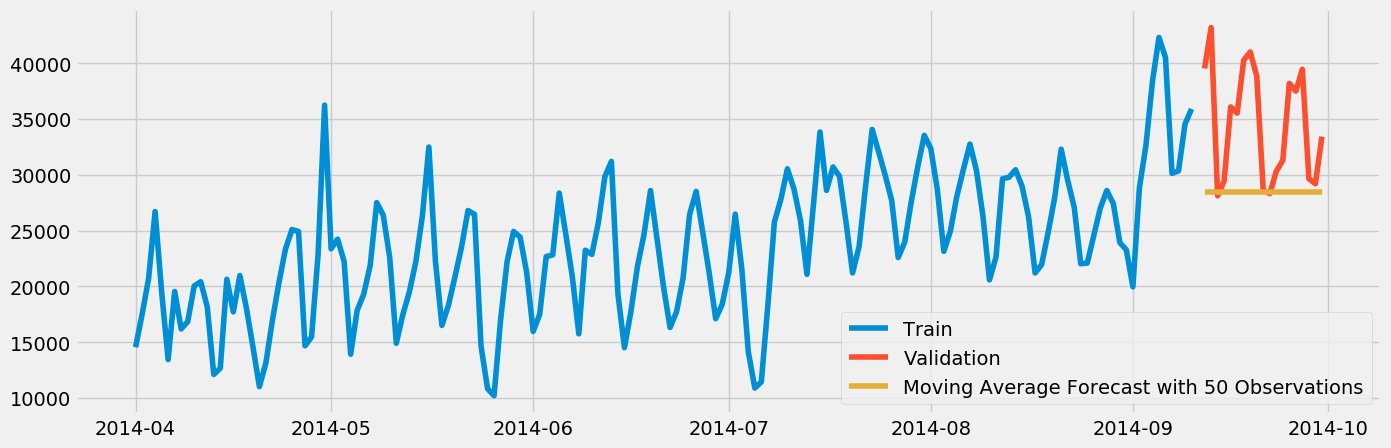

In [48]:
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast'] = train_ts['Date/Time'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast'] = train_ts['Date/Time'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = test_ts.copy()
y_hat_avg['moving_average_forecast']= train_ts['Date/Time'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [49]:
rmse = sqrt(mean_squared_error(test_ts['Date/Time'], y_hat_avg['moving_average_forecast']))
rmse

7885.059783928484

#### This model gives huge RMSE value too showing this model isn't good for our dataset

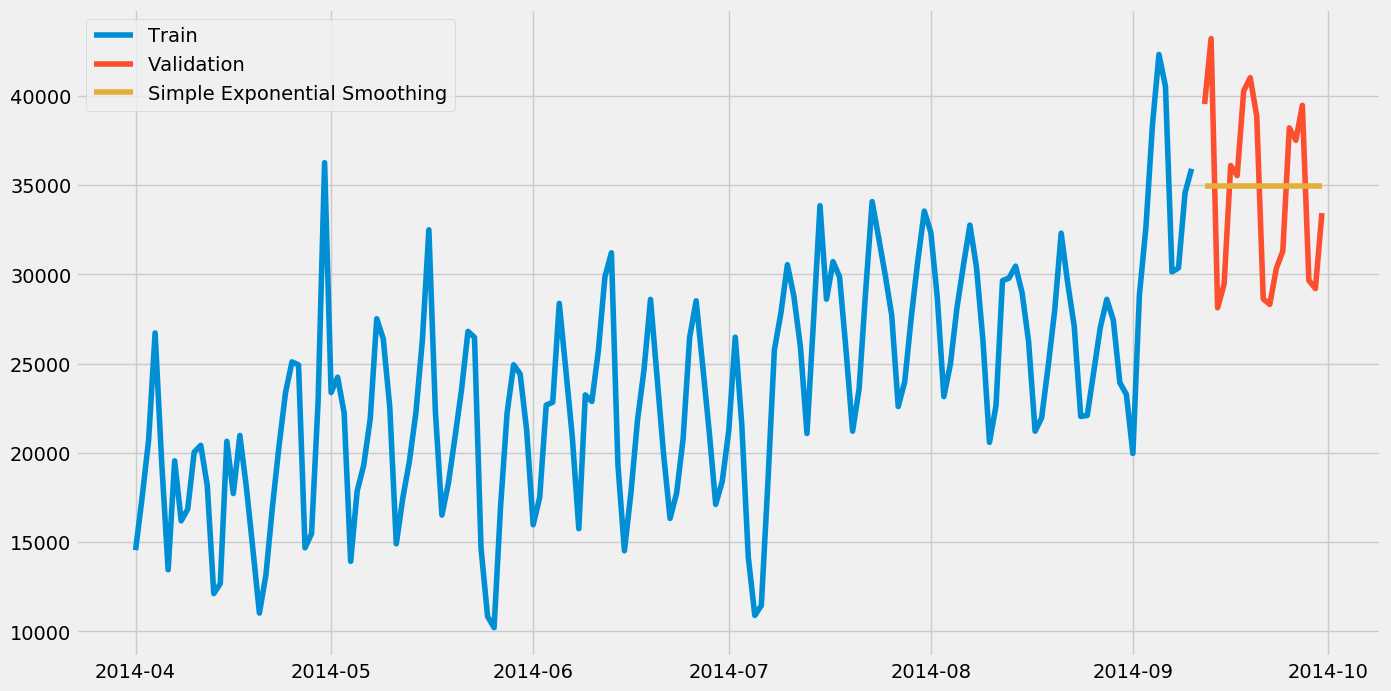

In [50]:
y_hat = test_ts.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_ts['Date/Time'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(test_ts))
plt.figure(figsize =(15,8))
plt.plot(train_ts['Date/Time'], label = 'Train')
plt.plot(test_ts['Date/Time'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')


#### Simple Exponential Smoothing is not the right model for our dataset

# ANN

In this model only one hidden layer is chosen because it is just a two class problem with huge dataset.

In [51]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [53]:
K.clear_session()

model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
234082/234082 [==============================] - 222s 948us/step - loss: 0.0055
Epoch 2/100
234082/234082 [==============================] - 224s 958us/step - loss: 0.0055
Epoch 3/100
234082/234082 [==============================] - 243s 1ms/step - loss: 0.0055
Epoch 4/100
234082/234082 [==============================] - 276s 1ms/step - loss: 0.0055
Epoch 5/100
234082/234082 [==============================] - 249s 1ms/step - loss: 0.0055
Epoch 6/100
234082/234082 [==============================] - 219s 934us/step - loss: 0.0055
Epoch 00006: early stopping


In [54]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_train_pred_ann))
print("Train : {:0.3f}".format(rmse))

rmse = sqrt(mean_squared_error(y_test,y_pred_test_ann))
print("Test : {:0.3f}".format(rmse))

model.save('Uber_ANN')

Train : 0.144
Test : 0.148


#### Here we can see the Root Mean Square Error values are less. 
This is the least when compared with other standard splits of 70-30, 80-20 and 95- 05

In [55]:
model_ann = load_model('Uber_ANN')

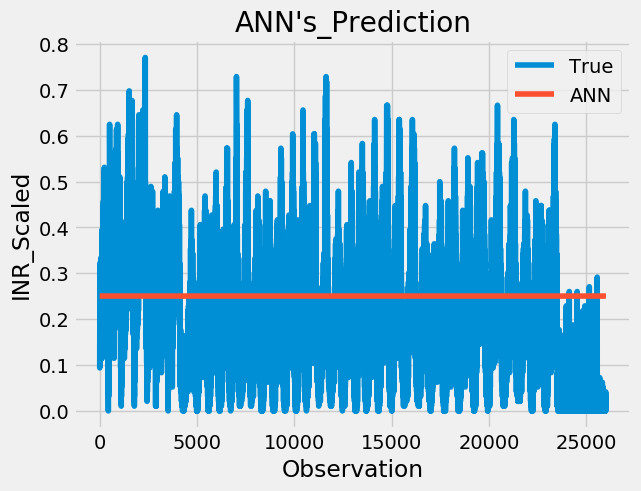

In [56]:
y_pred_test_ANN = model_ann.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [57]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
print('ANN: %f'%score_ann)

26008/26008 [==============================] - 10s 371us/step
ANN: 0.022012


#### Error Score for this model is very low, hence ANN model gives best results for the problem.

## Result

#### From the abve analysis we can see that ANN gave the best result for our dataset with least RMSE value of 0.022. Followed by Holt's Winter Season and SABRIMA  with small RMSE values compared to other models used.